# Математичні моделі в продуктовому маркетингу

## Churn Prediction - EDA + Logistic Regression

###  Практична робота 3

1. Завантажте дані telecom dataset. Проведіть EDA, підготовку даних перед моделюванням згідно інструкцій в Л 3.

2. Оцініть модель логістичної регресії. Визначте і візуалізуйте точність (ROC/AUC, Accuracy, Precision, Recall, F1 Score), проведіть Stratified K-Fold Cross Validation, оцініть feature importance, оптимальний threshold рівень, спробуйте покращити точність моделі згідно інструкцій в Л 3.

3. Інтерпретуйте отримані результати. Зробіть висновки.

**_Студентка Пороскун Олена. Група ПМ.м-21_**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis with pandas

1. Зрозумійте особливості вибірки даних та обчисліть зведену статистику

In [3]:
df = pd.read_csv('Churn.csv')

In [4]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [6]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [7]:
 df.mean() 

Account_Length    101.064806
Vmail_Message       8.099010
Day_Mins          179.775098
Eve_Mins          200.980348
Night_Mins        200.872037
Intl_Mins          10.237294
CustServ_Calls      1.562856
Day_Calls         100.435644
Day_Charge         30.562307
Eve_Calls         100.114311
Eve_Charge         17.083540
Night_Calls       100.107711
Night_Charge        9.039325
Intl_Calls          4.479448
Intl_Charge         2.764581
Area_Code         437.182418
dtype: float64

2. Визначте кількість клієнтів, що скасувала підписку

In [8]:
print(df['Churn'].value_counts())

no     2850
yes     483
Name: Churn, dtype: int64


4. Визначте аномалії та пропущені значення.

In [9]:
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [10]:
#df_copy = df.copy()
#df_copy.loc[df_copy.Churn == 'no', 'Churn'] = 0
#df_copy.loc[df_copy.Churn == 'yes', 'Churn'] = 1
#display(df_copy.head())
#print(df['Churn'].value_counts())
#print(df_copy['Churn'].value_counts())

In [11]:
df_copy = df.drop(columns = ['Churn', 'Intl_Plan', 'Vmail_Plan', 'Phone', 'State'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Day_Calls       3333 non-null   int64  
 8   Day_Charge      3333 non-null   float64
 9   Eve_Calls       3333 non-null   int64  
 10  Eve_Charge      3333 non-null   float64
 11  Night_Calls     3333 non-null   int64  
 12  Night_Charge    3333 non-null   float64
 13  Intl_Calls      3333 non-null   int64  
 14  Intl_Charge     3333 non-null   float64
 15  Area_Code       3333 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 416.8 KB


In [12]:
from sklearn.svm import OneClassSVM
model = OneClassSVM(kernel = 'rbf', gamma=0.001, nu=0.05).fit(df_copy)
y_pred = model.predict(df_copy)

In [13]:
print(pd.value_counts(y_pred))

 1    1913
-1    1420
dtype: int64


In [14]:
anomaly = df_copy.iloc[np.where(y_pred == -1)]
print(np.shape(anomaly))

(1420, 16)


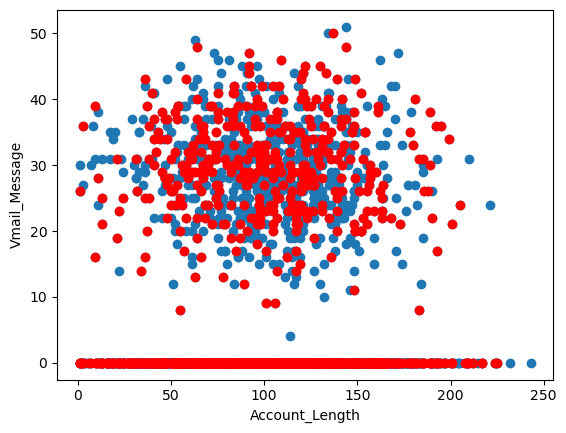

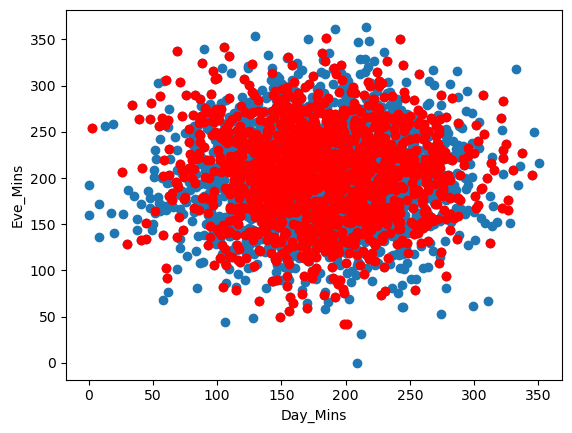

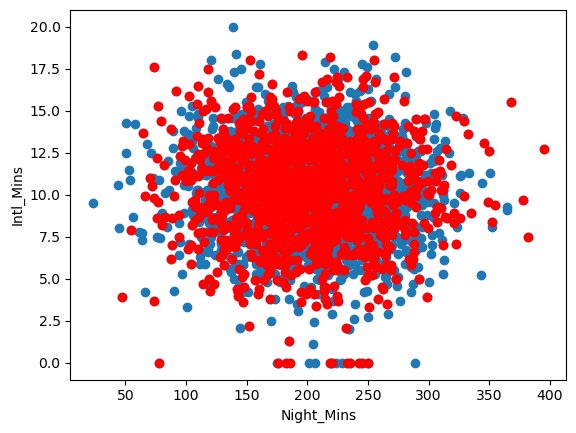

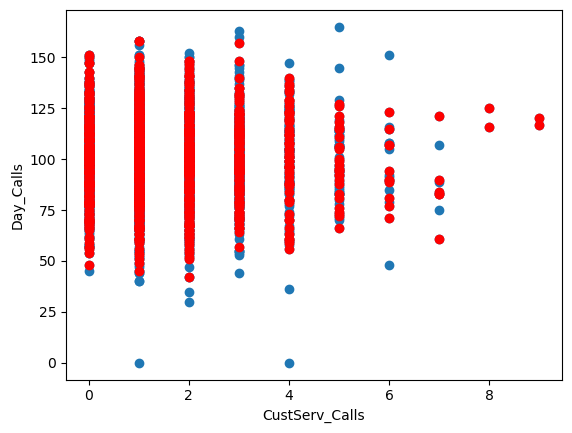

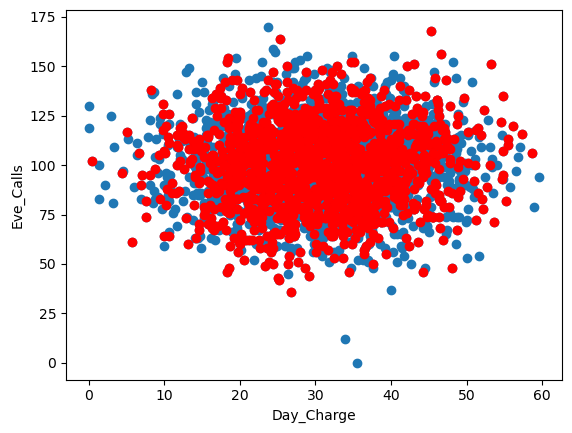

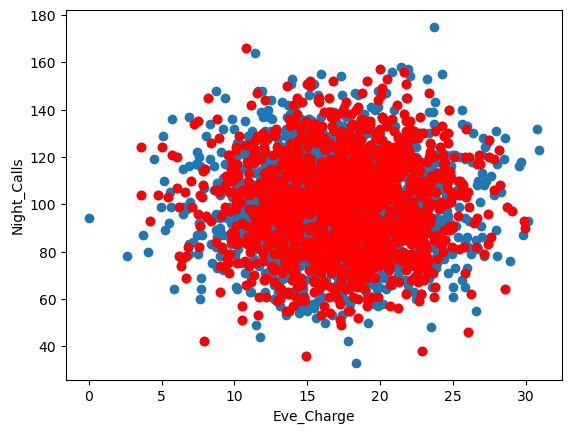

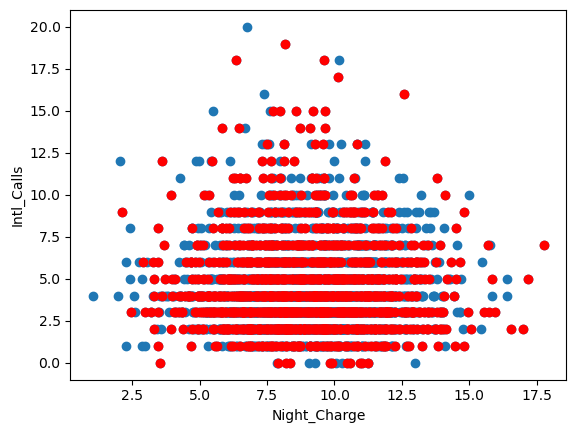

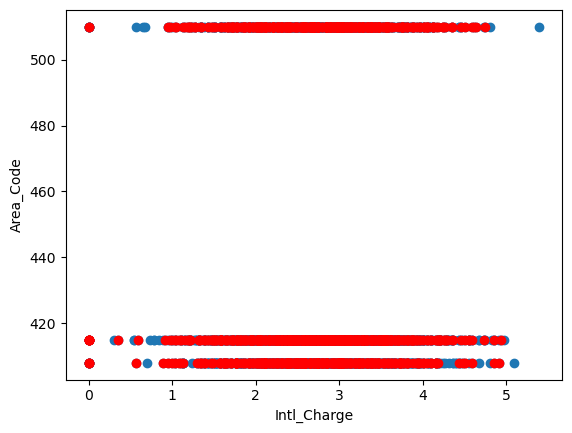

In [15]:
col = df_copy.columns

for i in range(0, len(col), 2):
    c = col[i]
    c2 = col[i+1]
    plt.scatter(df_copy[c] , df_copy[c2])
    plt.scatter(anomaly[c], anomaly[c2], c='r')
    plt.xlabel(c)
    plt.ylabel(c2)
    
    plt.show()

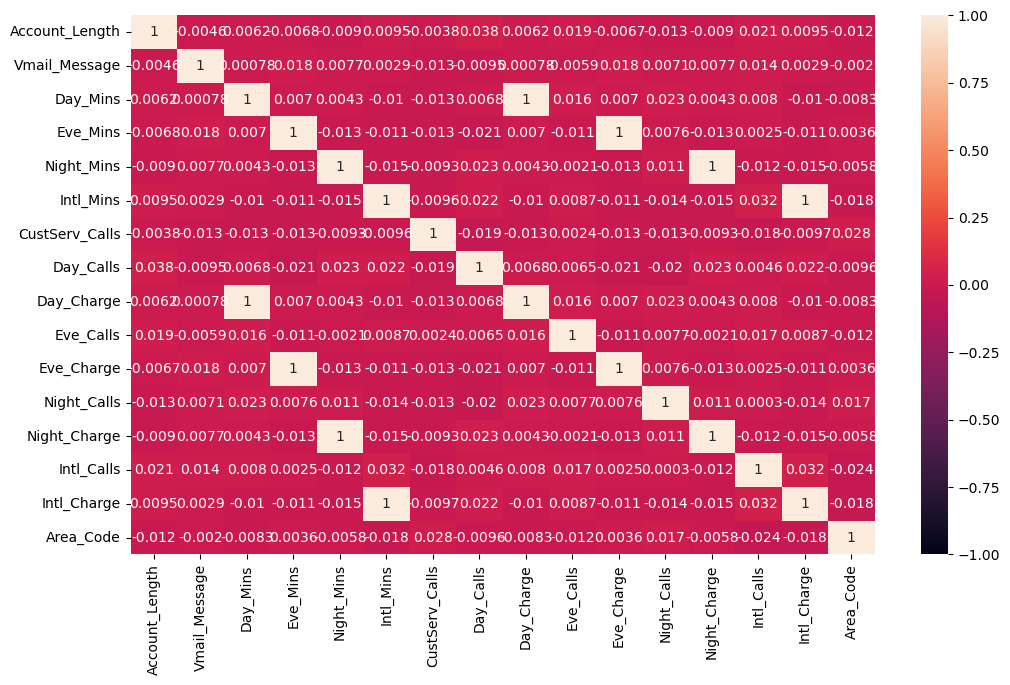

In [16]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [17]:
df_copy = df.drop(columns = ['Churn', 'Intl_Plan', 'Vmail_Plan', 'Phone', 'State'])
col = df_copy.columns
col_list = []
for i in range(0, len(col), 4):
    col_list.append(col[i:i+4].values)
col_list        

[array(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins'],
       dtype=object),
 array(['Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls'],
       dtype=object),
 array(['Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls'],
       dtype=object),
 array(['Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Area_Code'],
       dtype=object)]

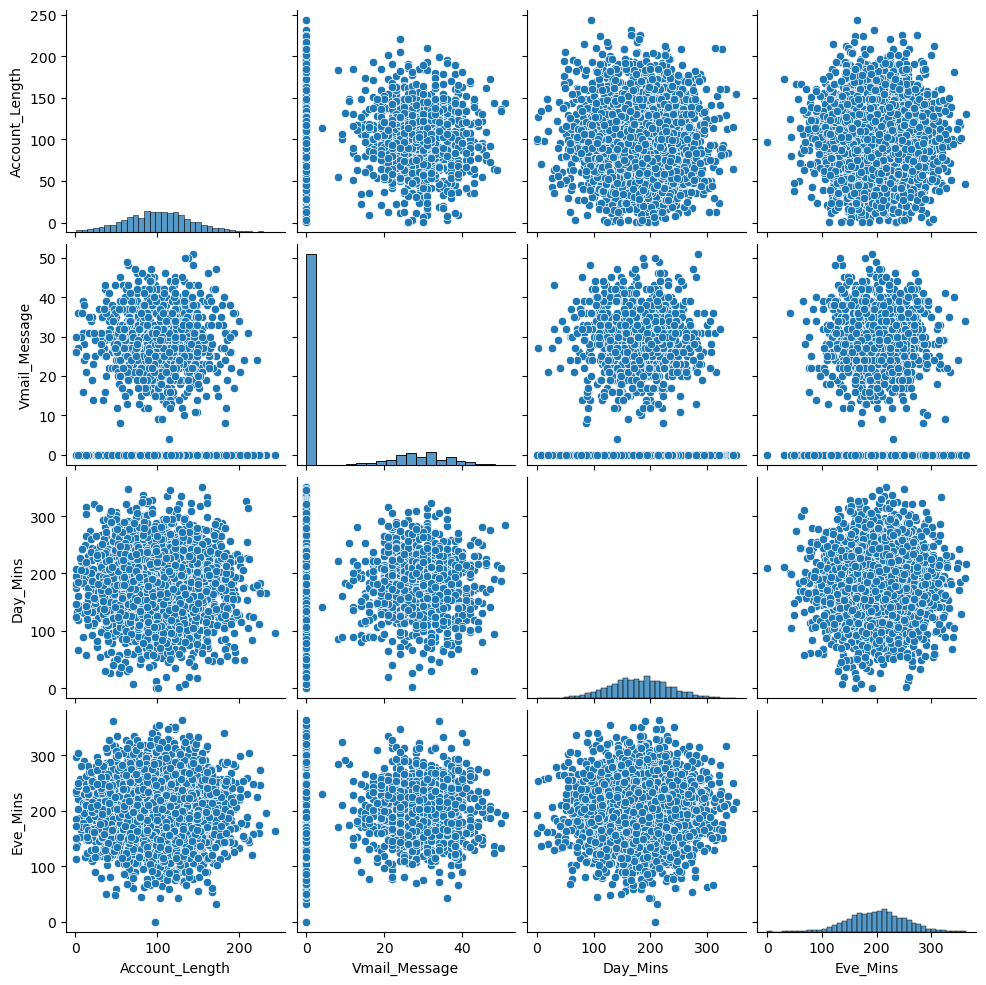

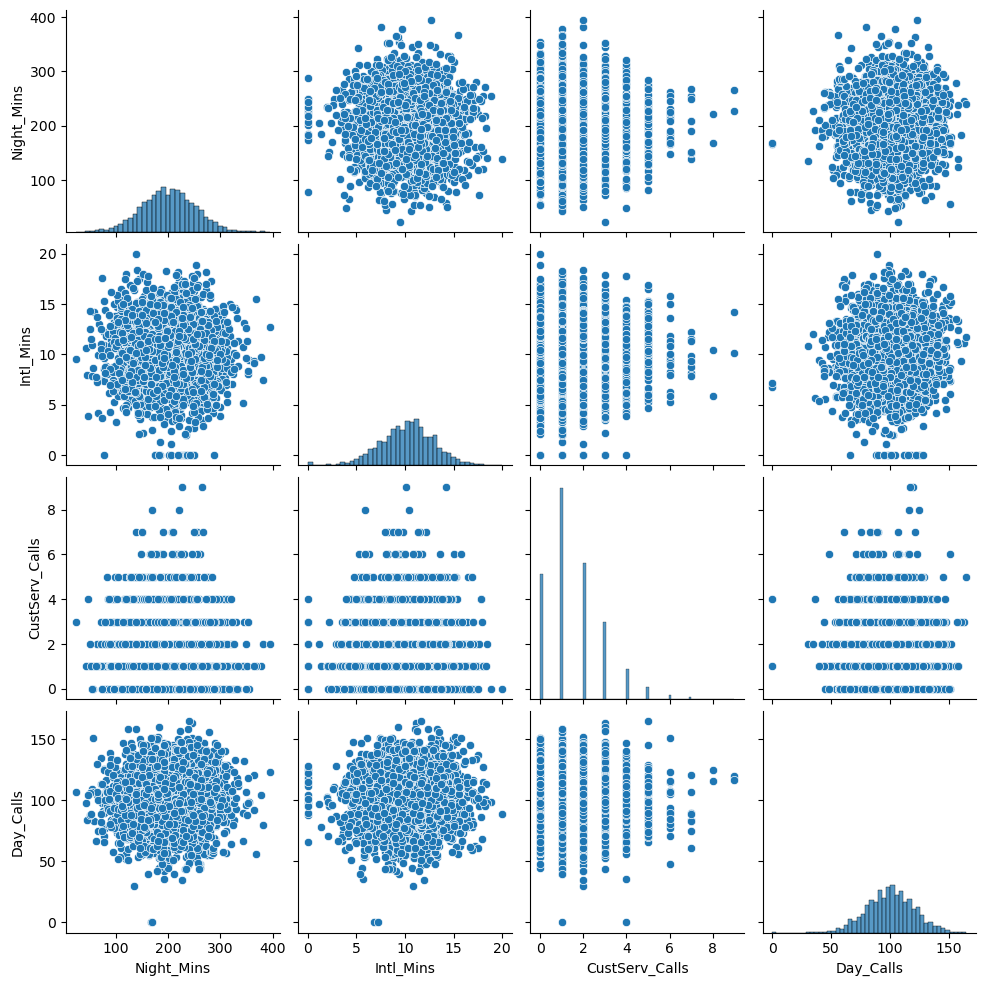

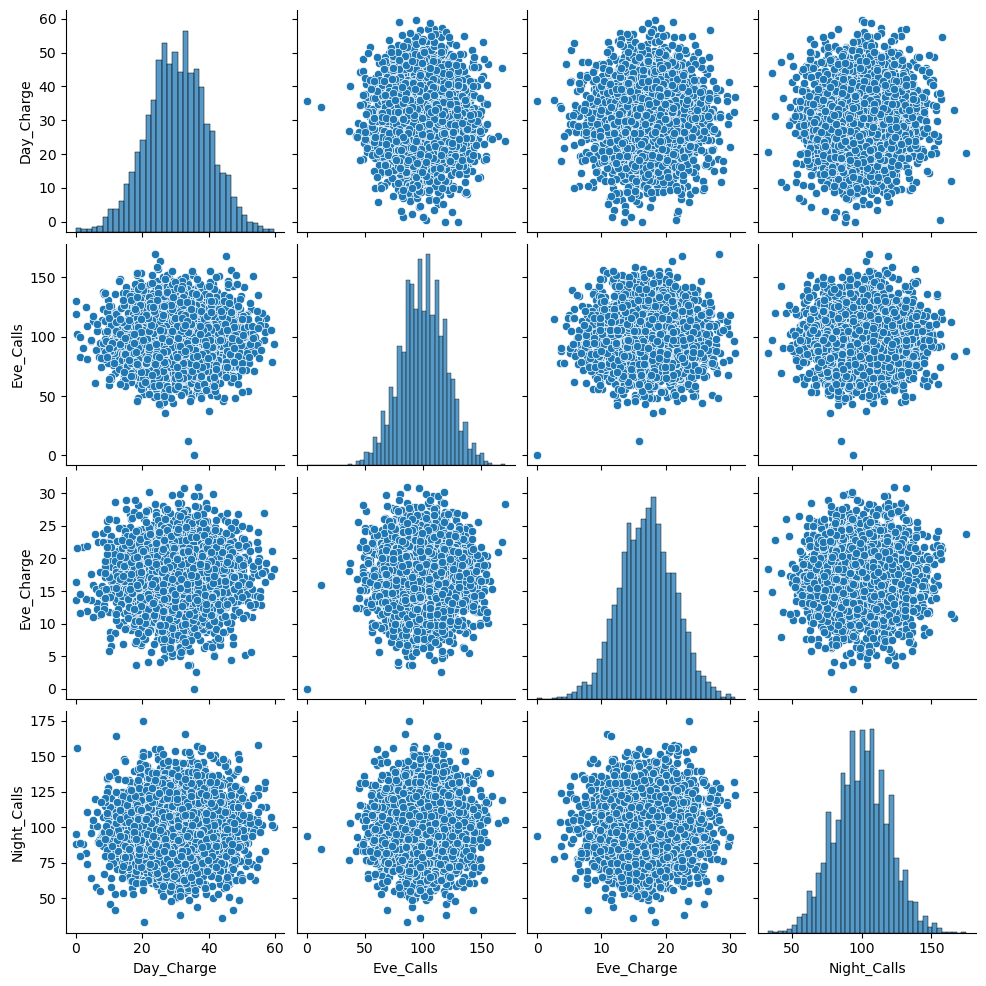

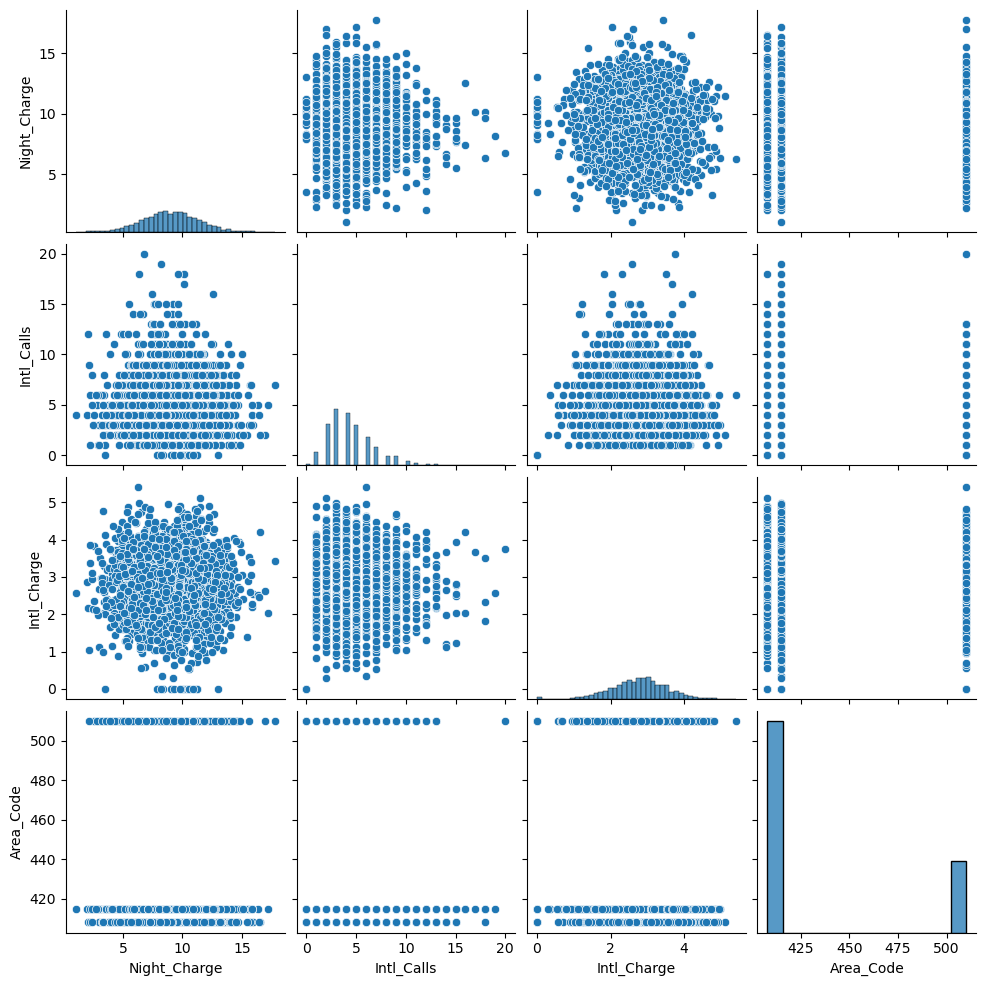

In [18]:
df_copy = df.drop(columns = ['Churn', 'Intl_Plan', 'Vmail_Plan', 'Phone', 'State'])
col = df_copy.columns

for i in range(0, len(col), 4):
    df_copy2 = df_copy[col[i:i+4]]
    #plt.figure(figsize=(13,17))
    sns.pairplot(data=df_copy2)
    plt.show()

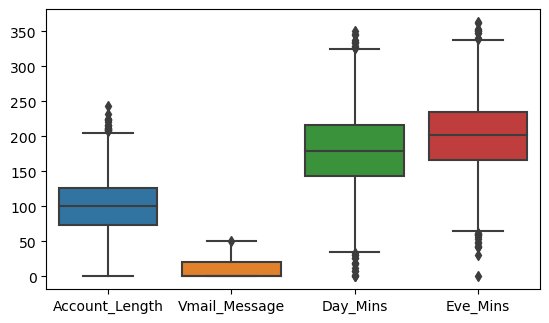

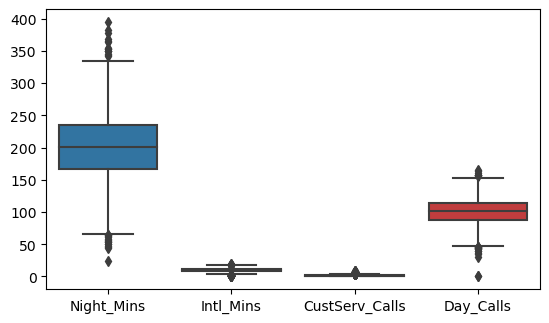

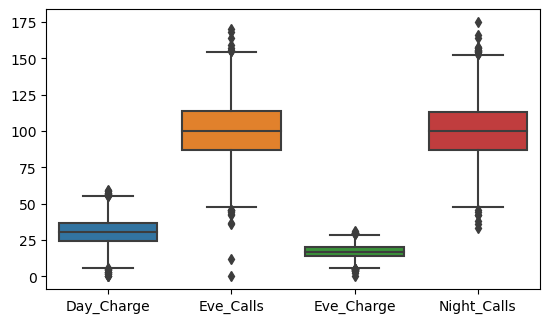

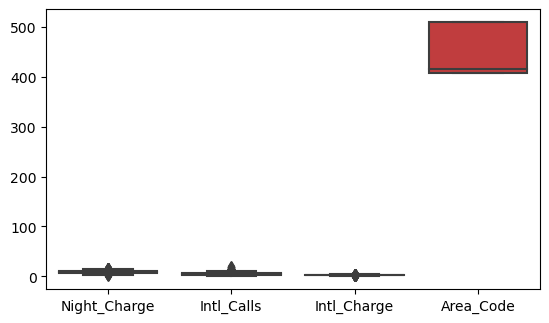

In [19]:
df_copy = df.drop(columns = ['Churn', 'Intl_Plan', 'Vmail_Plan', 'Phone', 'State'])
col = df_copy.columns
#plt.figure(figsize = (10,10))
k=0
for i in range(0, len(col), 4):
    plt.figure(figsize = (14,8))
    df_copy2 = df_copy[col[i:i+4]]
    plt.subplot(2, 2, k+1)
    sns.boxplot(data=df_copy2)
    k += 1
    plt.show()

3. Визначте відмінності між тими клієнтами, які скасували підписку і залишилися:

In [20]:
# Підрахуйте кількість підписників та не підписників за штатом
print(df.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


**Візуалізація даних з seaborn & matplotlib**

1. Візуалізація розподілу даних:

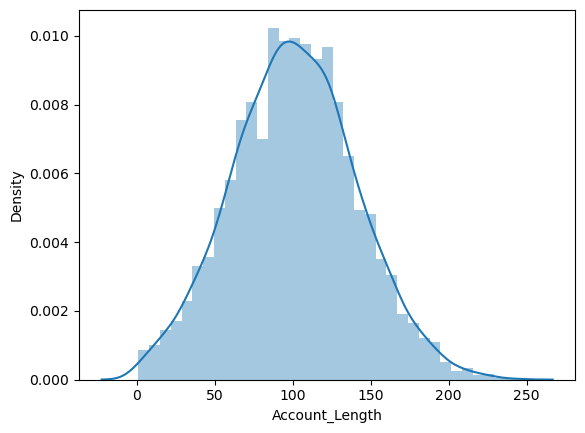

In [21]:
sns.distplot(df['Account_Length']) 
plt.show()

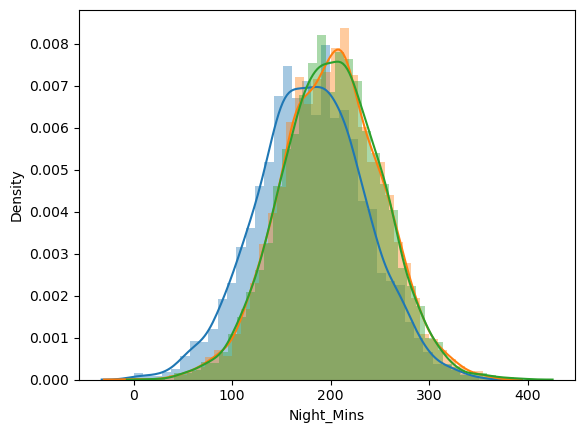

In [22]:
sns.distplot(df['Day_Mins']) 
sns.distplot(df['Eve_Mins'])
sns.distplot(df['Night_Mins'])
plt.show()

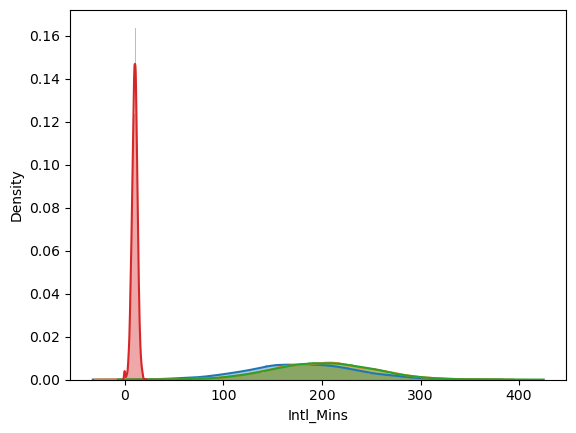

In [23]:
sns.distplot(df['Day_Mins']) 
sns.distplot(df['Eve_Mins'])
sns.distplot(df['Night_Mins'])
sns.distplot(df['Intl_Mins']) 
plt.show()

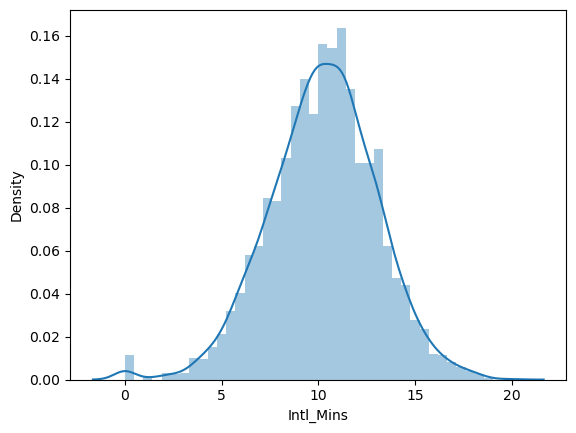

In [24]:
sns.distplot(df['Intl_Mins']) 
plt.show()

2. .

Відмінності в Account _ Length - Box plot

* з викидами (outliers)

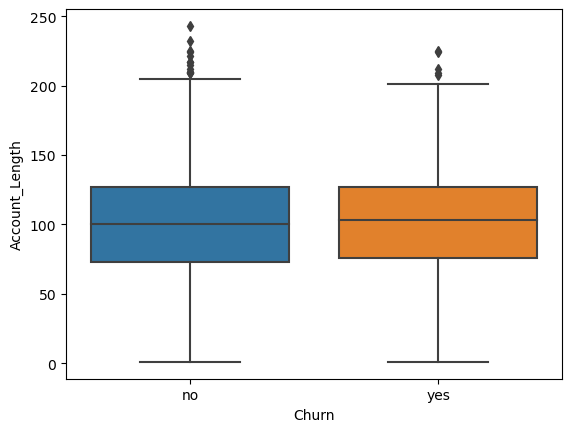

In [25]:
sns.boxplot(x = 'Churn',  y = 'Account_Length' , data = df) 
plt.show()

* без викидів (outliers)

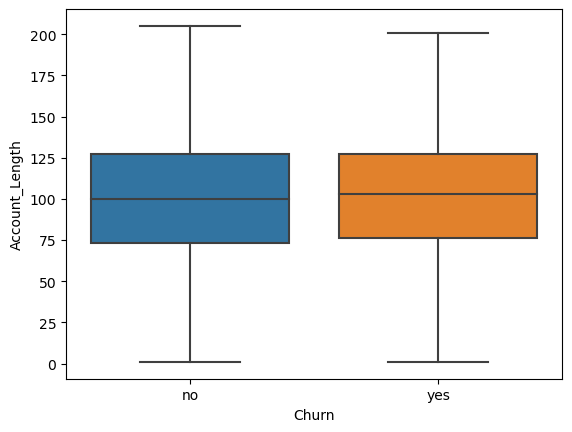

In [26]:
sns.boxplot(x = 'Churn', y = 'Account_Length', data = df, sym="") 
plt.show()

Відмінності в Account_Length + Intl_Plan - Box plot:

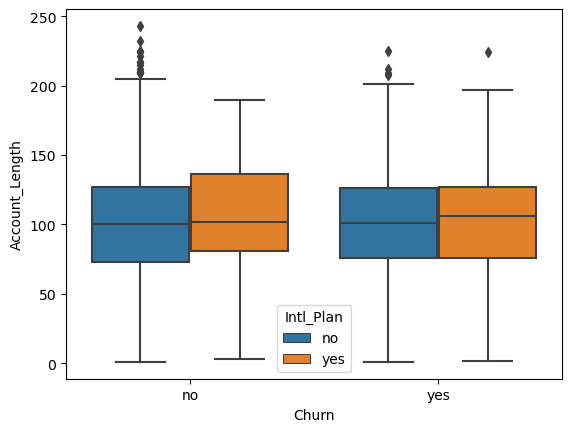

In [27]:
sns.boxplot(x = 'Churn', 
            y = 'Account_Length', 
            data = df,
            hue = 'Intl_Plan')
#plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
plt.show()

Створіть box plot з відкладанням 'Churn' на осі х та 'CustServ_Calls' на осі у.

Дослідіть інші змінні.

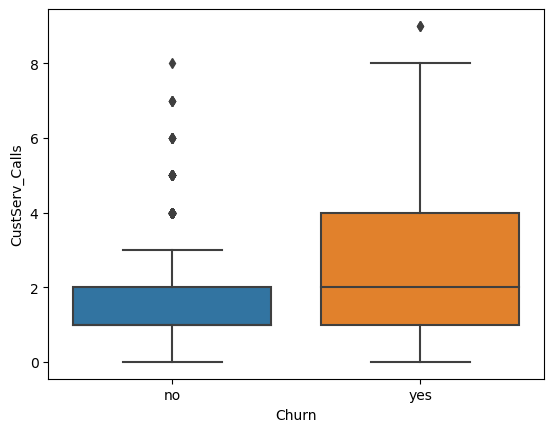

In [28]:
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = df)
plt.show()

In [29]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

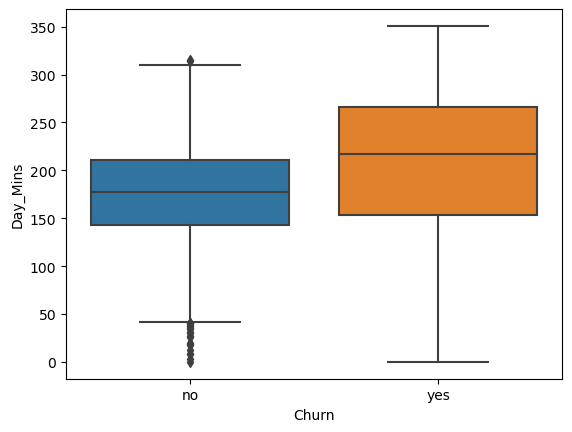

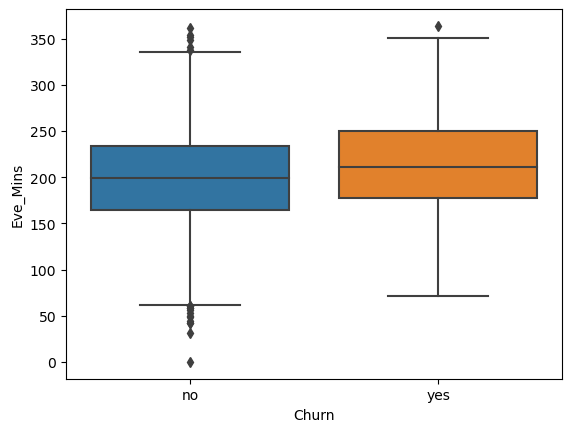

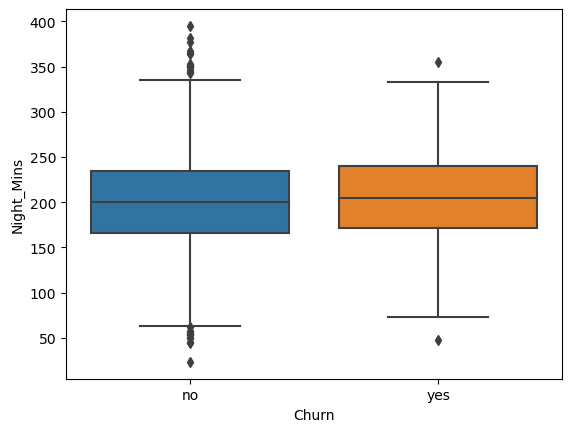

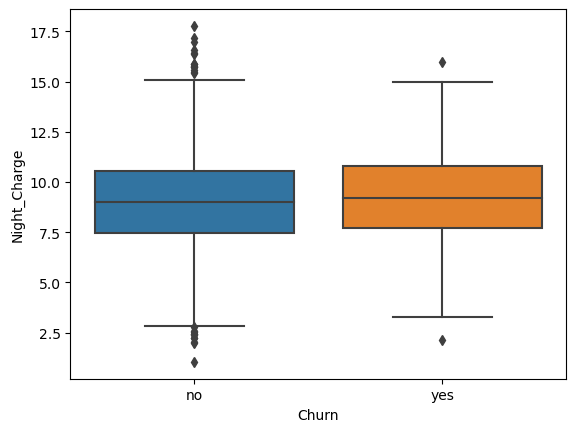

In [30]:
sns.boxplot(x = 'Churn', y = 'Day_Mins', data = df)
plt.show()

sns.boxplot(x = 'Churn', y = 'Eve_Mins', data = df)
plt.show()

sns.boxplot(x = 'Churn', y = 'Night_Mins', data = df)
plt.show()

sns.boxplot(x = 'Churn', y = 'Night_Charge', data = df)
plt.show()

In [31]:
df.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [32]:
df['Intl_Plan'].head()

0     no
1     no
2     no
3    yes
4    yes
Name: Intl_Plan, dtype: object

In [33]:
#df['Intl_Plan'].replace({'no':0 , 'yes':1}) 
#df['Intl_Plan'].head()

In [34]:
#from sklearn.preprocessing import LabelEncoder

#LabelEncoder().fit_transform(df["Intl_Plan"]) 
#df['Intl_Plan'].head()

In [35]:
df.loc[df.Intl_Plan == 'no', 'Intl_Plan'] = 0
df.loc[df.Intl_Plan == 'yes', 'Intl_Plan'] = 1
df['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: object

In [36]:
df['State'].head(4)

0    KS
1    OH
2    NJ
3    OH
Name: State, dtype: object

In [37]:
df['Intl_Calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Intl_Calls, dtype: float64

In [38]:
df['Night_Mins'].describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Night_Mins, dtype: float64

In [39]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,0,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,0,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,0,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,1,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,1,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [40]:
from sklearn.preprocessing import StandardScaler 

df.loc[df.Churn == 'no', 'Churn'] = 0
df.loc[df.Churn == 'yes', 'Churn'] = 1

df.loc[df.Vmail_Plan == 'no', 'Vmail_Plan'] = 0
df.loc[df.Vmail_Plan == 'yes', 'Vmail_Plan'] = 1

df = df.drop(columns = ['Phone', 'Area_Code', 'State']) 
StandardScaler().fit_transform(df) 

array([[ 0.67648946,  1.23488274,  1.56676695, ...,  0.86602851,
        -0.60119509, -0.0856905 ],
       [ 0.14906505,  1.30794844, -0.33373776, ...,  1.05938994,
        -0.60119509,  1.2411686 ],
       [ 0.9025285 , -0.59175986,  1.16830364, ..., -0.75557074,
         0.21153386,  0.69715637],
       ...,
       [-1.83505538, -0.59175986,  0.01881963, ..., -0.17548645,
         0.61789834,  1.3871231 ],
       [ 2.08295458, -0.59175986,  0.62477766, ..., -1.22139599,
         2.24335625, -1.87695028],
       [-0.67974475,  1.23488274,  1.00304237, ...,  0.80010984,
        -0.19483061,  1.2411686 ]])

In [41]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [42]:
telco = df.drop(columns = ['Account_Length', 'Vmail_Message']) 

In [43]:
telco.corr() 

,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Day_Mins,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Day_Calls,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
Day_Charge,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
Eve_Calls,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674
Eve_Charge,0.007029,1.000000,-0.012592,-0.011043,-0.012987,-0.021449,0.007036,-0.011423,1.000000,0.007596,-0.012601,0.002541,-0.011074
Night_Calls,0.022972,0.007586,0.011204,-0.013605,-0.012802,-0.019557,0.022972,0.007710,0.007596,1.000000,0.011188,0.000305,-0.013630


In [44]:
telco['Day_Cost'] = telco['Day_Mins'] / telco['Day_Charge']
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

values = {'Day_Cost': 0}
telco.fillna(value=values, inplace = True)

telco.rename(columns = {'Churn':'target'}, inplace = True)

In [45]:
telco.head()

,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,target,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Day_Cost,Avg_Night_Calls
0,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,5.881961,2.689011
1,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,5.882781,2.469903
2,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,5.882069,1.563462
3,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,5.882122,2.212360
4,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,5.882145,1.544628


In [46]:
telco.isnull().sum()

Day_Mins           0
Eve_Mins           0
Night_Mins         0
Intl_Mins          0
CustServ_Calls     0
target             0
Intl_Plan          0
Vmail_Plan         0
Day_Calls          0
Day_Charge         0
Eve_Calls          0
Eve_Charge         0
Night_Calls        0
Night_Charge       0
Intl_Calls         0
Intl_Charge        0
Day_Cost           0
Avg_Night_Calls    0
dtype: int64

In [47]:
X = telco.drop('target', axis = 1)
y = telco['target']

y = y.astype('int')
y.dtypes

dtype('int32')

In [48]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

svc = SVC() 
svc.fit(X_train, y_train) 
y_pred = svc.predict(X_test)

In [49]:
svc.score(X_test, y_test)

0.848575712143928

In [50]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[566,   0],
       [101,   0]], dtype=int64)

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train) 
y_pred_log = logreg.predict(X_test)

In [52]:
y_pred_prob = logreg.predict_proba(X_test)[:,1] 
y_pred_prob[:5]

array([0.07564255, 0.01262033, 0.79011183, 0.12829267, 0.05886488])

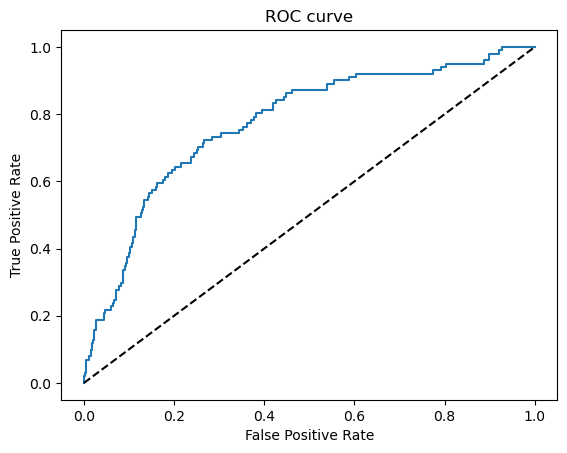

In [53]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
plt.plot(fpr, tpr) 

plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.plot([0, 1], [0, 1], "k--")  
plt.show() 

In [54]:
from sklearn.metrics import roc_auc_score 

auc = roc_auc_score(y_test, y_pred_prob) 
auc

0.7739390546828534

In [55]:
from sklearn import metrics 

accuracy  = metrics.accuracy_score(y_test, y_pred_log)
precision = metrics.precision_score(y_test, y_pred_log)
recall    = metrics.recall_score(y_test, y_pred_log)

print("Accuracy:\t",  accuracy) 
print("Precision:\t", precision) 
print("Recall: \t",   recall)

Accuracy:	 0.8515742128935532
Precision:	 0.5714285714285714
Recall: 	 0.07920792079207921


In [56]:
F1_Score = 2*(precision*recall) / (precision + recall)
print("F1_Score: \t",   F1_Score)

F1_Score: 	 0.1391304347826087


In [57]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_log))

0.1391304347826087


In [58]:
from sklearn.ensemble import RandomForestClassifier
# Створення класифікатора
clf = RandomForestClassifier()

# Підгонка до навчальних даних
clf.fit(X_train, y_train)

# Прогнозування міток тестового набору
y_pred_RFC = clf.predict(X_test)
y_pred_RFC

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [59]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

df_rf = pd.DataFrame(random_forest.feature_importances_, columns=['feat'], index = X.columns)
df_rf = df_rf['feat'].sort_values(ascending=True)
df_rf = pd.DataFrame(df_rf, columns=['feat'])
df_rf

,feat
Eve_Calls,0.028596
Night_Calls,0.030677
Day_Calls,0.032025
Night_Charge,0.032551
Day_Cost,0.033350
Avg_Night_Calls,0.034018
Vmail_Plan,0.034479
Night_Mins,0.034852
Intl_Mins,0.042557
Intl_Charge,0.045048


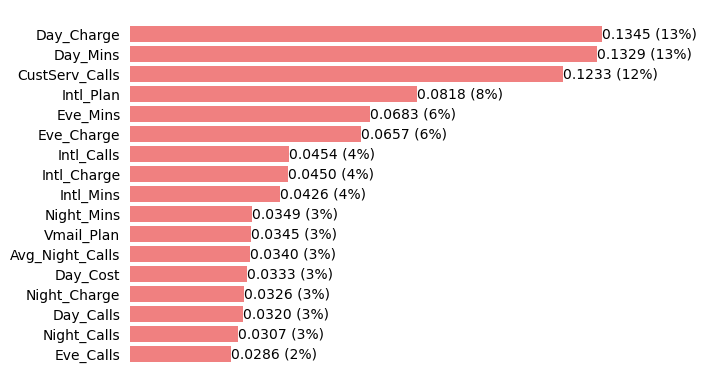

In [60]:
# скільки сегментів і який їхній відсоток
segments_counts = df_rf['feat']

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)), segments_counts, color='lightcoral')

ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Can\'t loose']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:4.4f} ({:}%)'.format(value,
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show(block=True)

Text(0.5, 0, 'importance')

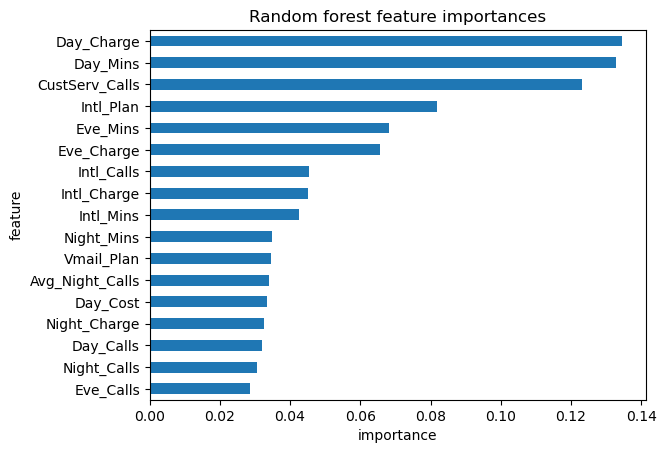

In [61]:
df_rf['feat'].plot(kind="barh")

plt.title("Random forest feature importances")
plt.ylabel("feature")
plt.xlabel("importance")

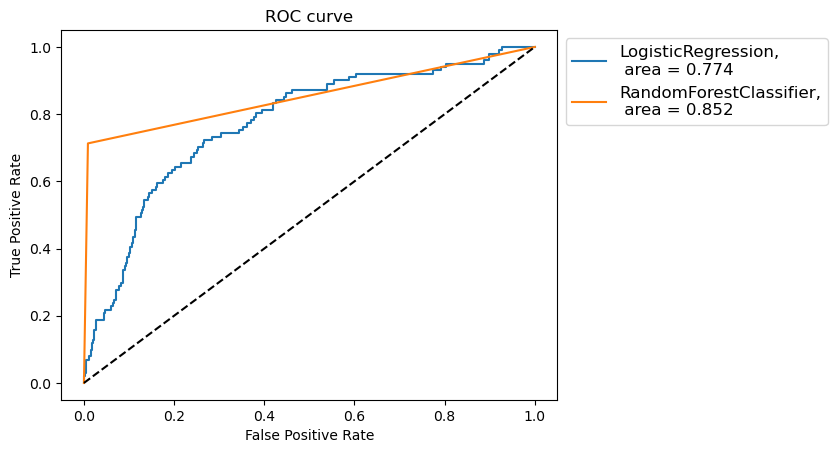

In [62]:
auc = roc_auc_score(y_test, y_pred_prob) 
auc2 = roc_auc_score(y_test, y_pred_RFC) 

#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_RFC) 
plt.plot(fpr, tpr, label='LogisticRegression,\n area = {:.3}'.format(auc)) 
plt.plot(fpr2, tpr2, label='RandomForestClassifier,\n area = {:.3}'.format(auc2))  

plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.plot([0, 1], [0, 1], "k--")  
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 12})
plt.show() 

Як бачимо класифікатор Випадкового лісу (RangomForestClassifier) судячи з метрики площи фігури під ROC-кривою - працює краще ніж метод логістичної регресії (LogisticRegression). Тому його саме краще застосовувати при аналізі на цьому датасеті.

Отже, одні з найважливіших ознак клієнтів: 
* Day_Charge: загальна вартість дзвінків клієнта протягом дня,
* Day_Mins: загальна тривалість дзвінків клієнта протягом дня (в хвилинах), 
* CustServ_Calls: кількість дзвінків до служби підтримки,
* Intenational_Plan: чи має клієнт міжнародний тарифний план (так/ні).

Тому при побудові маркетингової стратегії потрібно особоливо враховувати ці дані.

_______________________________________________________________________________________________________________________